In [2]:
from pathlib import Path
from typing import List
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import json
import os

sns.set(rc={'figure.figsize':(20,14)})

In [3]:
data_folder = "../data/columncompression20210226/shuffled"

os.system(f"p=$(pwd) && cd {data_folder} && python3 $p/benchmark_to_csv.py .")

def fancy_name(benchmark_name):
    a = benchmark_name.replace("tpch_", "").replace(".json", "").replace("_LTO", "").replace("_singlethreaded", "").replace("","")[2:]
    return map_benchmark_name(a)

def map_benchmark_name(b):
    return b \
        .replace("compactvector_f", "compactvector_16") \
        .replace("compressionUnencoded", "unencoded_Hyrise") \
        .replace("dictionary", "bytepacking_Hyrise_fsba") \
        .replace("bitpacking_simdcai", "for_SIMDCAI_simd") \
        .replace("bitpacking_turbopfor", "bitpacking_turboPFOR") \
        .replace("simdbp", "simdbp128_Hyrise") \

high_level = pd.read_csv(f"{data_folder}/benchmarks_parsed_high_level.csv")
high_level = high_level.sort_values("benchmark_run_name")
#high_level = high_level[~high_level["benchmark_run_name"].str.match(".*simdbp.*")]
high_level["fancy_name"] = [fancy_name(b) for b in high_level["benchmark_run_name"]]
high_level["codec_name"] = ["_".join(b.split("_")[:len(b.split("_")) - 2]) for b in high_level["fancy_name"]]
high_level["num_clients"] = [int(b.split("_")[len(b.split("_")) - 2]) for b in high_level["fancy_name"]]
high_level = high_level.sort_values("num_clients")
high_level

,benchmark_run_name,total_runtime,avg_throughput,fancy_name,codec_name,num_clients
9,./tpch_bitpacking_compactvector_14_shuffled.json,4.239725e+10,0.327872,bitpacking_compactvector_14_shuffled,bitpacking_compactvector,14
1,./tpch_bitpacking_compactvector_f_14_shuffled....,4.217271e+10,0.330039,bitpacking_compactvector_16_14_shuffled,bitpacking_compactvector_16,14
10,./tpch_bitpacking_simdcai_14_shuffled.json,4.908535e+10,0.283073,for_SIMDCAI_simd_14_shuffled,for_SIMDCAI_simd,14
14,./tpch_bitpacking_simdcai_seq_14_shuffled.json,5.362156e+10,0.259306,for_SIMDCAI_simd_seq_14_shuffled,for_SIMDCAI_simd_seq,14
8,./tpch_bitpacking_turbopfor_14_shuffled.json,4.217997e+10,0.329466,bitpacking_turboPFOR_14_shuffled,bitpacking_turboPFOR,14
3,./tpch_bitpacking_turbopfor_seq_14_shuffled.json,4.596888e+10,0.302277,bitpacking_turboPFOR_seq_14_shuffled,bitpacking_turboPFOR_seq,14
2,./tpch_compressionUnencoded_14_shuffled.json,4.190287e+10,0.331588,unencoded_Hyrise_14_shuffled,unencoded_Hyrise,14
5,./tpch_dictionary_14_shuffled.json,4.069727e+10,0.341751,bytepacking_Hyrise_fsba_14_shuffled,bytepacking_Hyrise_fsba,14
7,./tpch_bitpacking_compactvector_28_shuffled.json,6.154712e+10,0.450786,bitpacking_compactvector_28_shuffled,bitpacking_compactvector,28
15,./tpch_bitpacking_compactvector_f_28_shuffled....,6.095900e+10,0.455742,bitpacking_compactvector_16_28_shuffled,bitpacking_compactvector_16,28


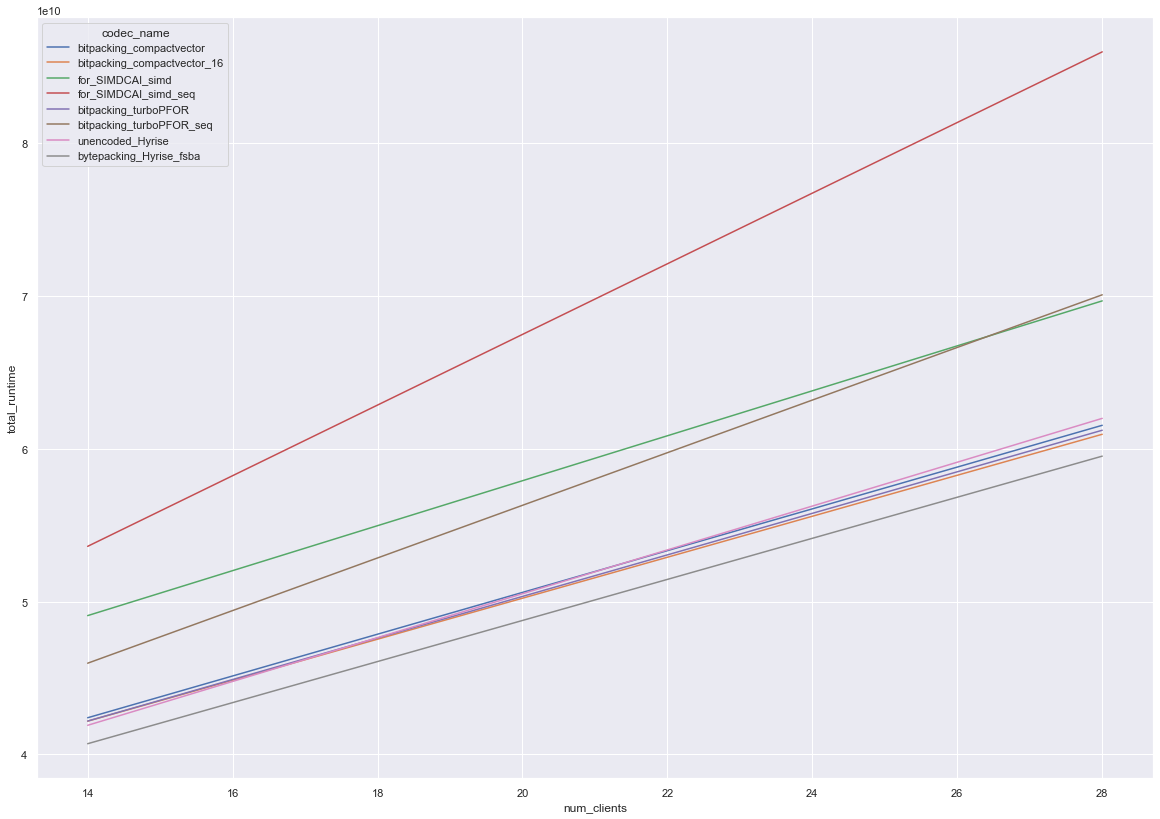

In [4]:

plot = sns.lineplot(data=high_level, x="num_clients", y="total_runtime", hue="codec_name")
plt.savefig(f"visualizations/tpch_multi_compression_high_level_both.svg", format="svg")

#plot_high_level(
 #   high_level[high_level["benchmark_run_name"].str.match(".*LTO.*")],
 #   "tpch_compression_high_level_with_lto")

In [5]:
high_level

,benchmark_run_name,total_runtime,avg_throughput,fancy_name,codec_name,num_clients
9,./tpch_bitpacking_compactvector_14_shuffled.json,4.239725e+10,0.327872,bitpacking_compactvector_14_shuffled,bitpacking_compactvector,14
1,./tpch_bitpacking_compactvector_f_14_shuffled....,4.217271e+10,0.330039,bitpacking_compactvector_16_14_shuffled,bitpacking_compactvector_16,14
10,./tpch_bitpacking_simdcai_14_shuffled.json,4.908535e+10,0.283073,for_SIMDCAI_simd_14_shuffled,for_SIMDCAI_simd,14
14,./tpch_bitpacking_simdcai_seq_14_shuffled.json,5.362156e+10,0.259306,for_SIMDCAI_simd_seq_14_shuffled,for_SIMDCAI_simd_seq,14
8,./tpch_bitpacking_turbopfor_14_shuffled.json,4.217997e+10,0.329466,bitpacking_turboPFOR_14_shuffled,bitpacking_turboPFOR,14
3,./tpch_bitpacking_turbopfor_seq_14_shuffled.json,4.596888e+10,0.302277,bitpacking_turboPFOR_seq_14_shuffled,bitpacking_turboPFOR_seq,14
2,./tpch_compressionUnencoded_14_shuffled.json,4.190287e+10,0.331588,unencoded_Hyrise_14_shuffled,unencoded_Hyrise,14
5,./tpch_dictionary_14_shuffled.json,4.069727e+10,0.341751,bytepacking_Hyrise_fsba_14_shuffled,bytepacking_Hyrise_fsba,14
7,./tpch_bitpacking_compactvector_28_shuffled.json,6.154712e+10,0.450786,bitpacking_compactvector_28_shuffled,bitpacking_compactvector,28
15,./tpch_bitpacking_compactvector_f_28_shuffled....,6.095900e+10,0.455742,bitpacking_compactvector_16_28_shuffled,bitpacking_compactvector_16,28


<AxesSubplot:xlabel='Library/Codec', ylabel='Total Runtime TPCH SF10 in ms'>

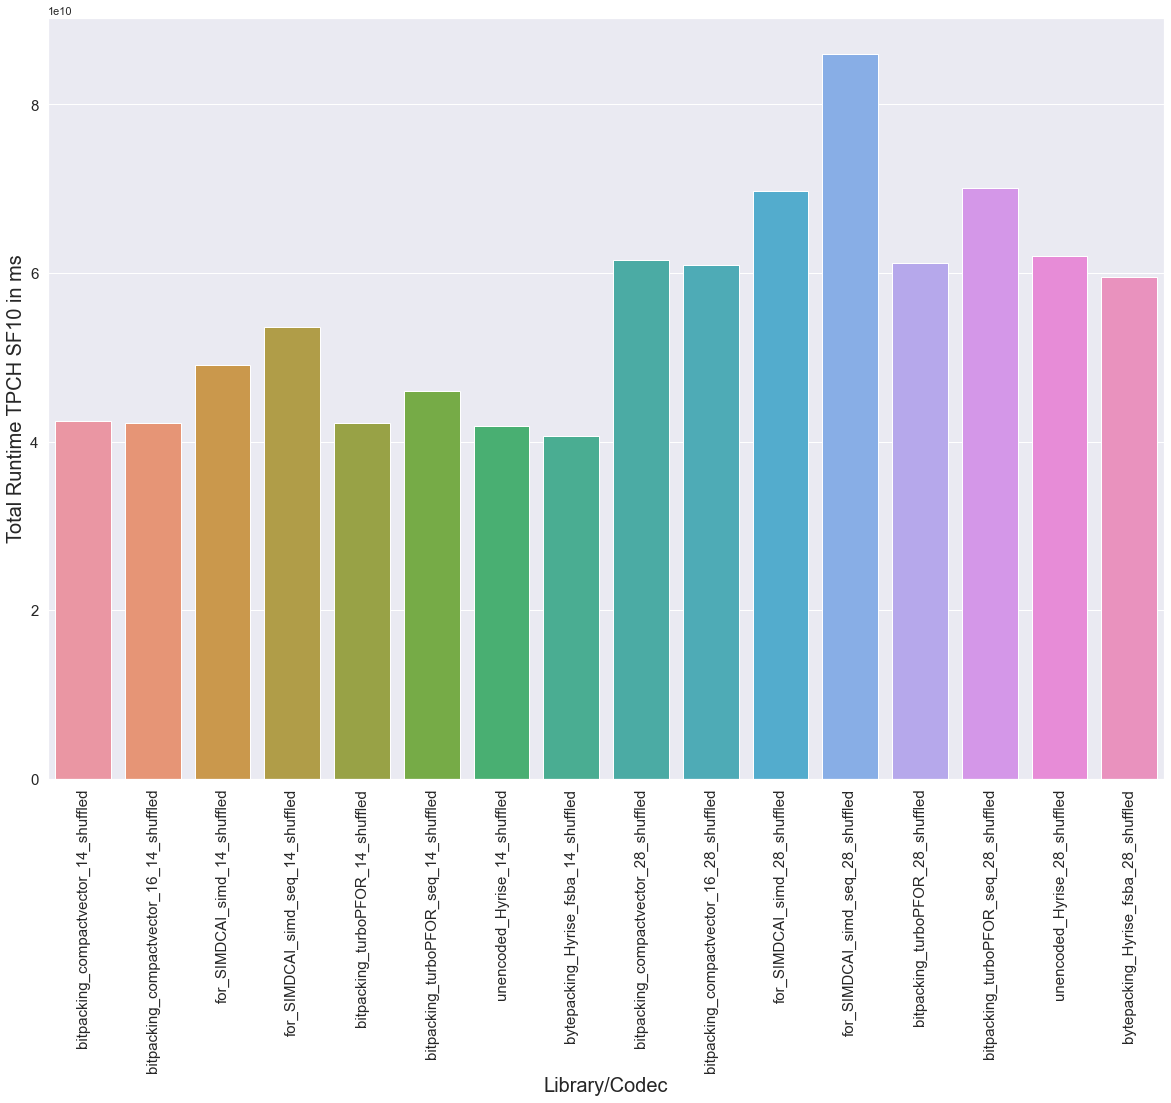

In [6]:
def plot_high_level(d, filename, plot=None):
    plt.tight_layout()
    if plot is None:
        plot = sns.barplot(data=d, x="fancy_name", y="total_runtime")
    # plot.set(ylim=(1.5 * 10**9, 2.05 * 10**9))
    plot.set_xlabel("Library/Codec",fontsize=20)
    plot.set_ylabel("Total Runtime TPCH SF10 in ms",fontsize=20) 
    plot.tick_params(labelsize=15)
    plot.set_xticklabels(plot.get_xticklabels(),rotation=90)

    plt.savefig(f"visualizations/{filename}.svg", format="svg")
    return plot
plot_high_level(
    high_level,
    "tpch_multi_compression_high_level_without_lto")

In [7]:
low_level = pd.read_csv(f"{data_folder}/benchmarks_parsed_low_level.csv")

def fancy_query_name(q):
    return q.replace("TPC-H ", "")

low_level["fancy_name"] = [fancy_name(b) for b in low_level["benchmark_run_name"]]
low_level["query_name"] = [fancy_query_name(b) for b in low_level["query_name"]]
low_level["codec_name"] = ["_".join(b.split("_")[:len(b.split("_")) - 2]) for b in low_level["fancy_name"]]
low_level["num_clients"] = [int(b.split("_")[len(b.split("_")) - 2]) for b in low_level["fancy_name"]]

low_level = low_level.sort_values("query_name")
low_level = low_level[~low_level["benchmark_run_name"].str.match(".*(simdbp).*")]
low_level

,benchmark_run_name,query_name,avg_duration,throughput,fancy_name,codec_name,num_clients
0,./tpch_bitpacking_simdcai_seq_28_shuffled.json,01,1.065515e+10,0.322343,for_SIMDCAI_simd_seq_28_shuffled,for_SIMDCAI_simd_seq,28
308,./tpch_bitpacking_simdcai_seq_14_shuffled.json,01,8.257122e+09,0.258754,for_SIMDCAI_simd_seq_14_shuffled,for_SIMDCAI_simd_seq,14
198,./tpch_bitpacking_compactvector_14_shuffled.json,01,6.372062e+09,0.326842,bitpacking_compactvector_14_shuffled,bitpacking_compactvector,14
264,./tpch_compressionUnencoded_28_shuffled.json,01,7.078663e+09,0.446132,unencoded_Hyrise_28_shuffled,unencoded_Hyrise,28
176,./tpch_bitpacking_turbopfor_14_shuffled.json,01,6.348637e+09,0.328361,bitpacking_turboPFOR_14_shuffled,bitpacking_turboPFOR,14
...,...,...,...,...,...,...,...
65,./tpch_compressionUnencoded_14_shuffled.json,22,3.042974e+08,0.331186,unencoded_Hyrise_14_shuffled,unencoded_Hyrise,14
43,./tpch_bitpacking_compactvector_f_14_shuffled....,22,3.384706e+08,0.329939,bitpacking_compactvector_16_14_shuffled,bitpacking_compactvector_16,14
21,./tpch_bitpacking_simdcai_seq_28_shuffled.json,22,8.024130e+08,0.323449,for_SIMDCAI_simd_seq_28_shuffled,for_SIMDCAI_simd_seq,28
329,./tpch_bitpacking_simdcai_seq_14_shuffled.json,22,4.646420e+08,0.259860,for_SIMDCAI_simd_seq_14_shuffled,for_SIMDCAI_simd_seq,14


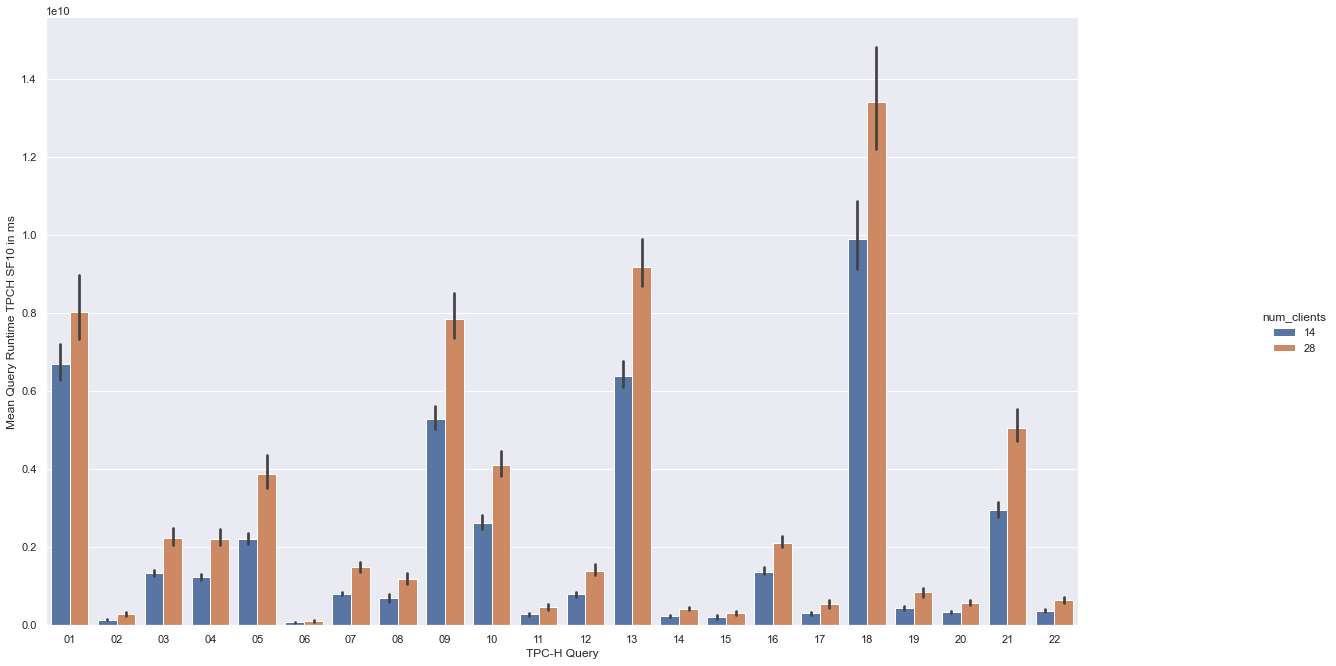

In [8]:
plot = sns.catplot(data=low_level, x="query_name", y="avg_duration", kind="bar", hue="num_clients")
plot.set_axis_labels("TPC-H Query", "Mean Query Runtime TPCH SF10 in ms")
plot.fig.set_size_inches(20 ,10)
plt.savefig(f"visualizations/tpch_multi_compression_low_level_absolute.svg", format="svg")

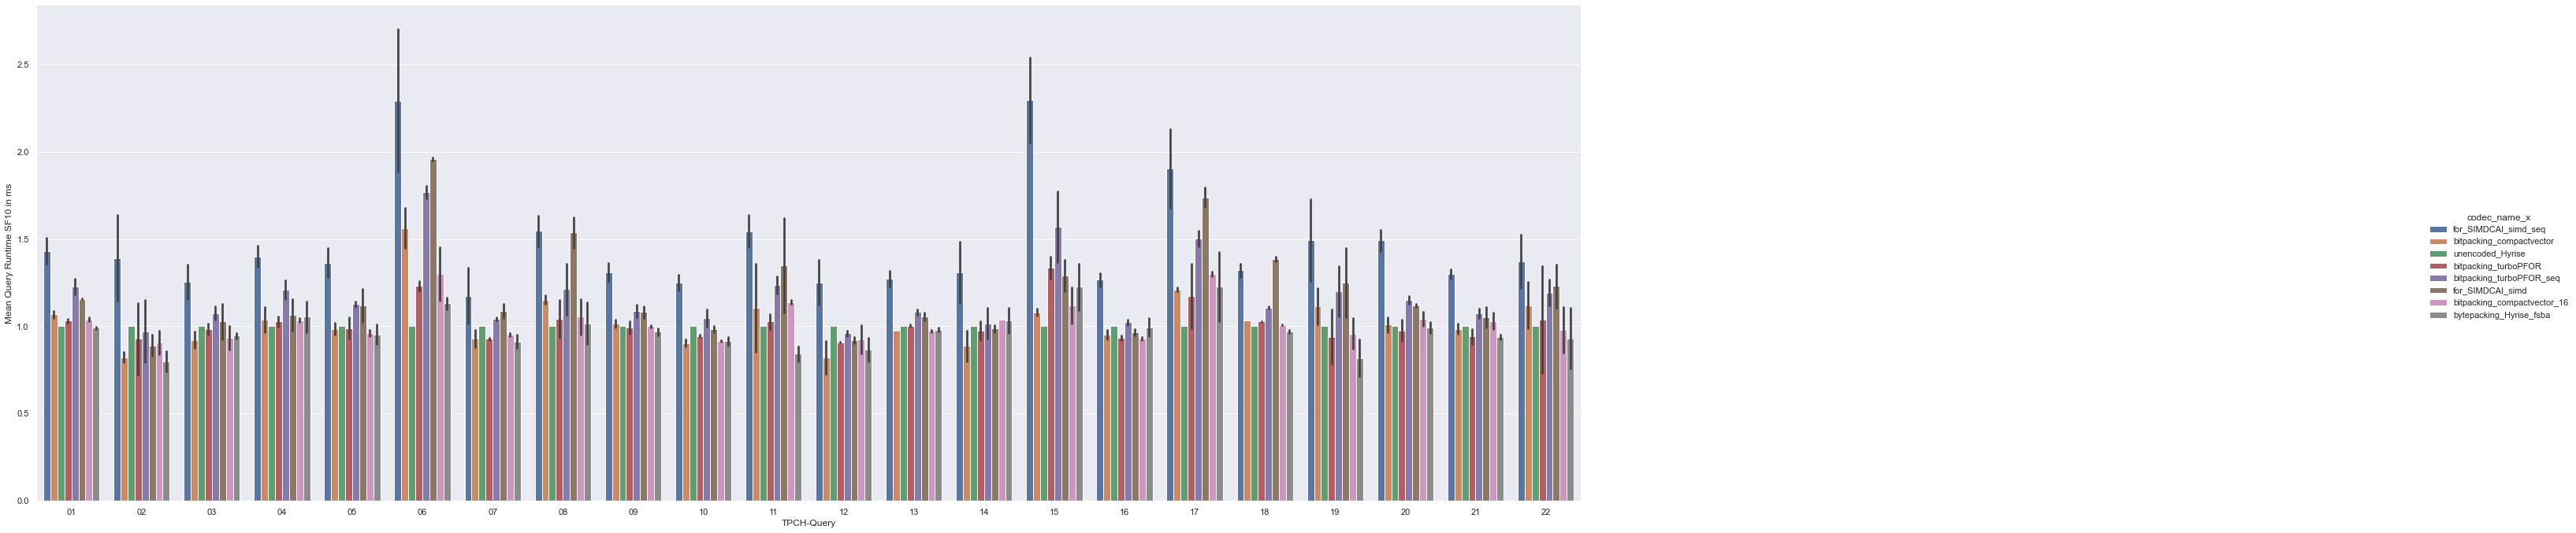

In [9]:
low_level["key"] = low_level["query_name"] + low_level["num_clients"].astype(str)
default_query_durations = low_level[low_level["codec_name"].str.match(".*unencoded.*")]
merged = low_level.merge(default_query_durations, how="left", left_on="key", right_on="key")
merged["duration_percentage"] = merged["avg_duration_x"] / merged["avg_duration_y"]
filtered = merged # merged[~merged["benchmark_run_name_x"].str.match(".*(fsba|turbopfor_seq).*")]
plot = sns.catplot(data=filtered, x="query_name_x", y="duration_percentage", kind="bar", hue="codec_name_x")
plot.set_axis_labels("TPCH-Query", "Mean Query Runtime SF10 in ms")
plot.fig.set_size_inches(50,10)
plt.savefig(f"visualizations/tpch_multi_compression_low_level_percentage.svg", format="svg")
plt.show()


In [10]:
codec_names = filtered["codec_name_x"].unique()
codec_names.sort()
excluded = ["for_SIMDCAI_simd", "for_SIMDCAI_simd_seq", "bitpacking_turboPFOR_seq"]
codec_names = [c for c in codec_names if not c in excluded]
codec_names

['bitpacking_compactvector',
 'bitpacking_compactvector_16',
 'bitpacking_turboPFOR',
 'bytepacking_Hyrise_fsba',
 'unencoded_Hyrise']

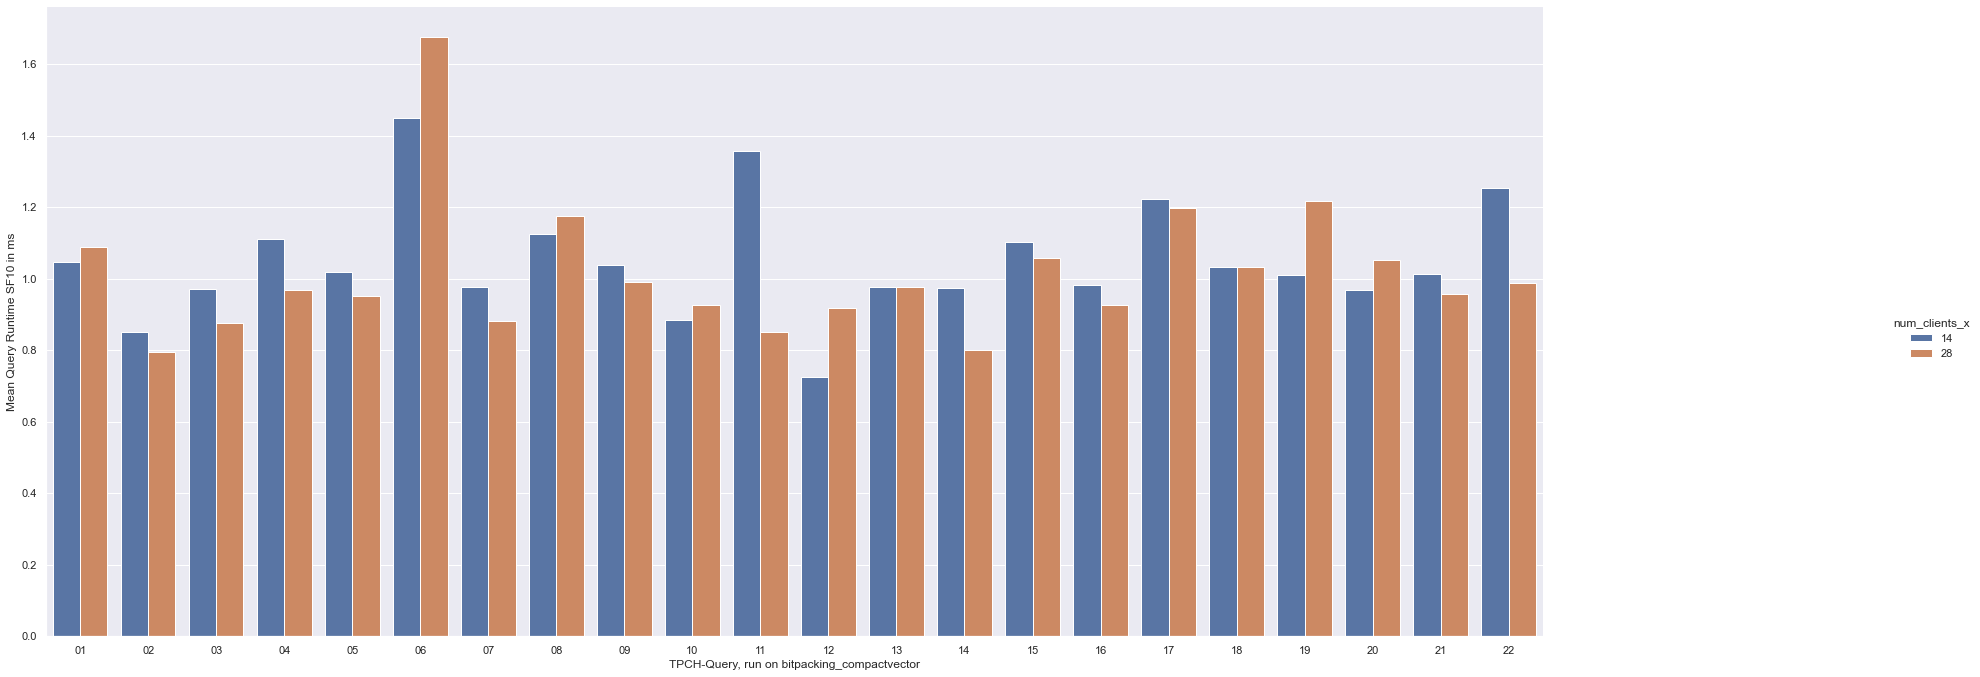

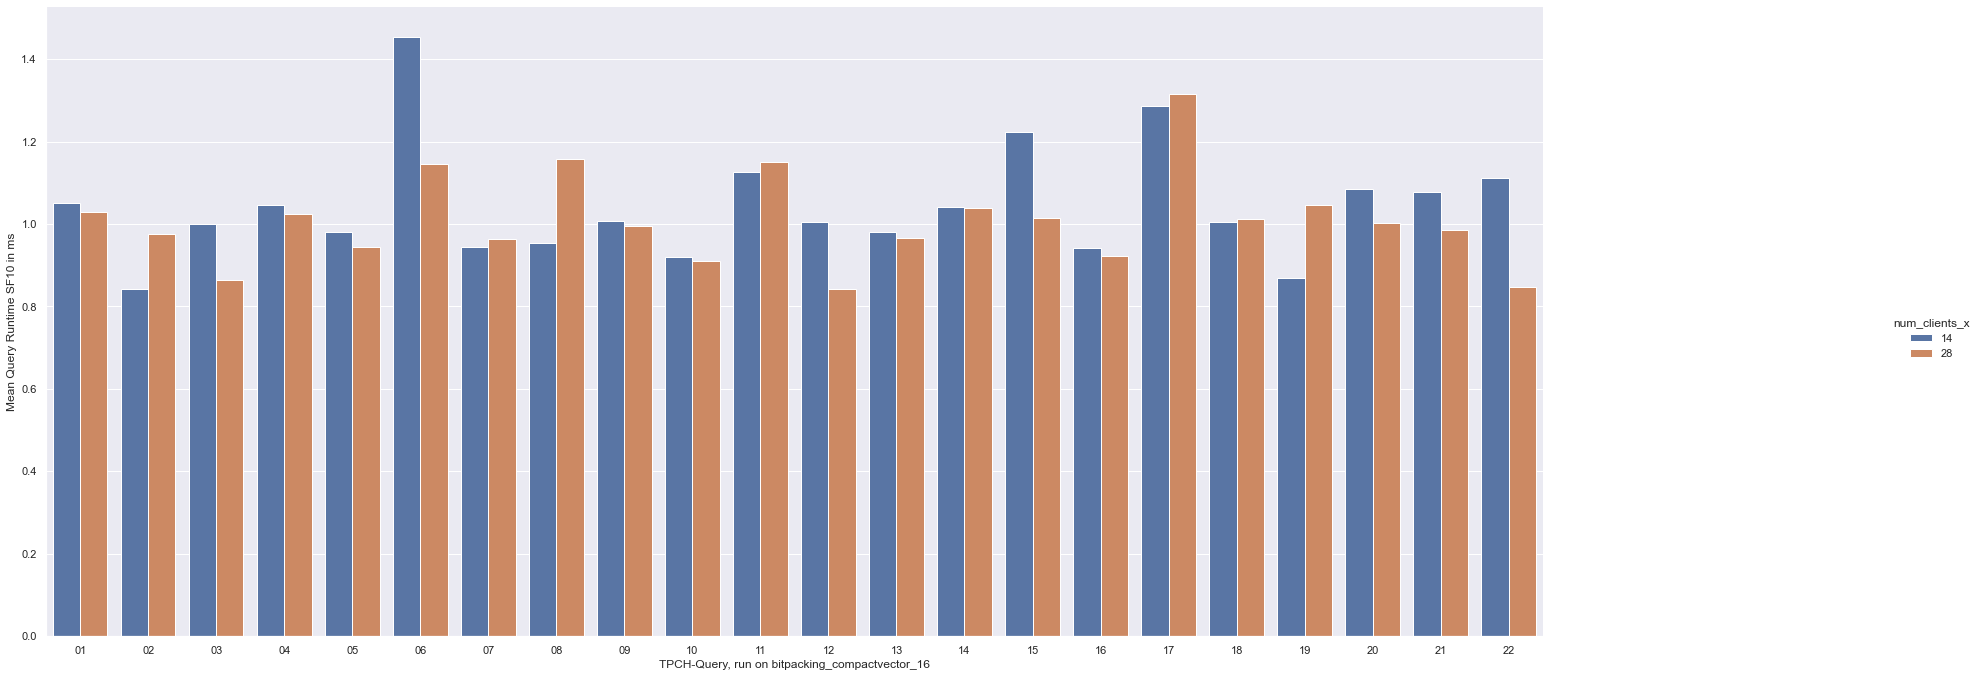

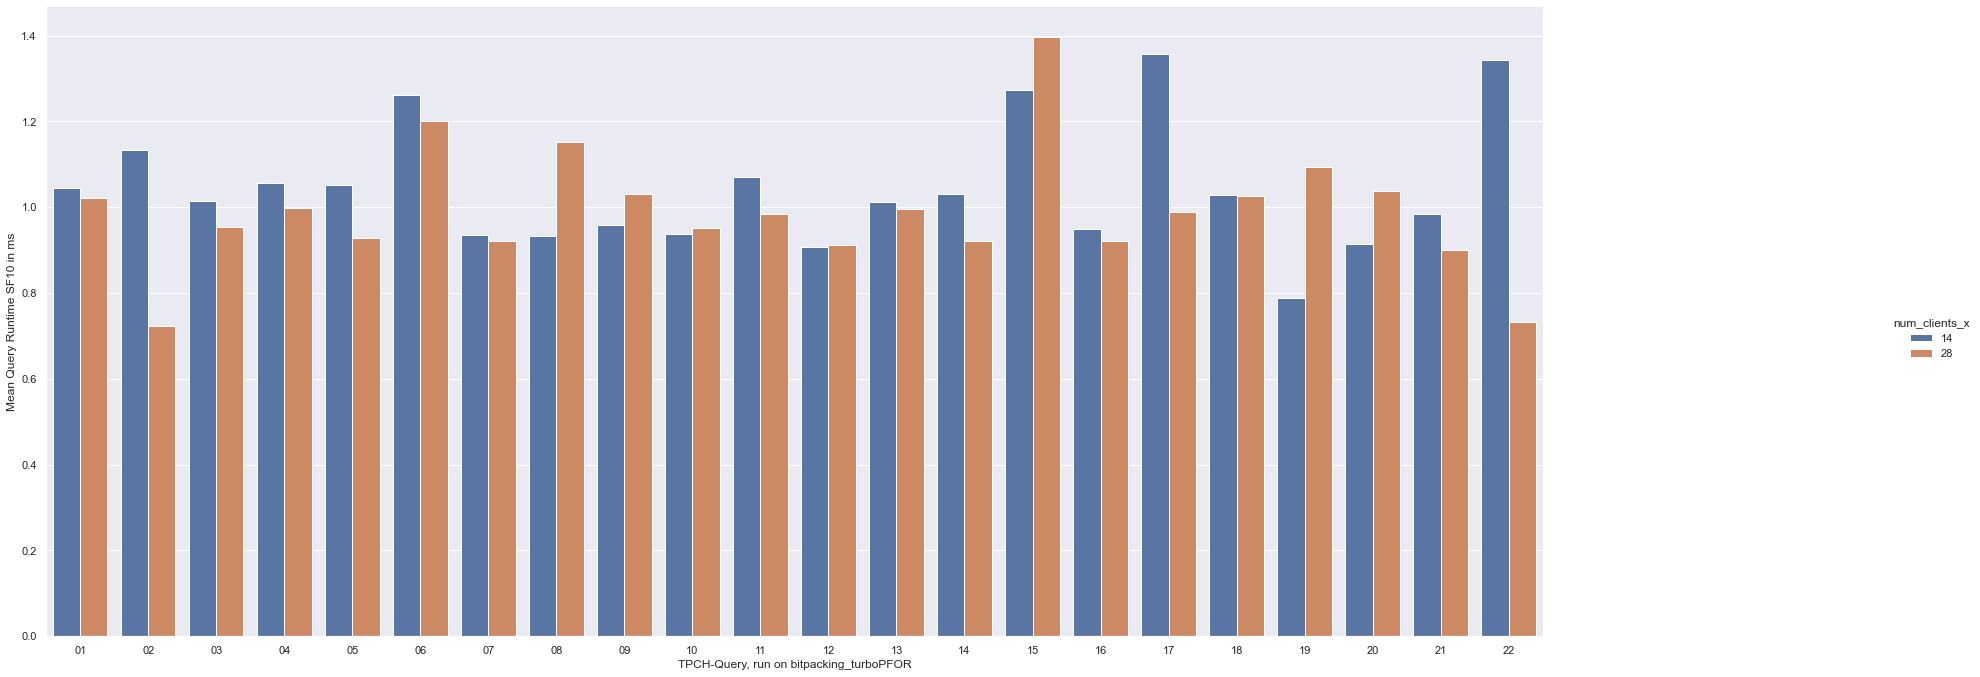

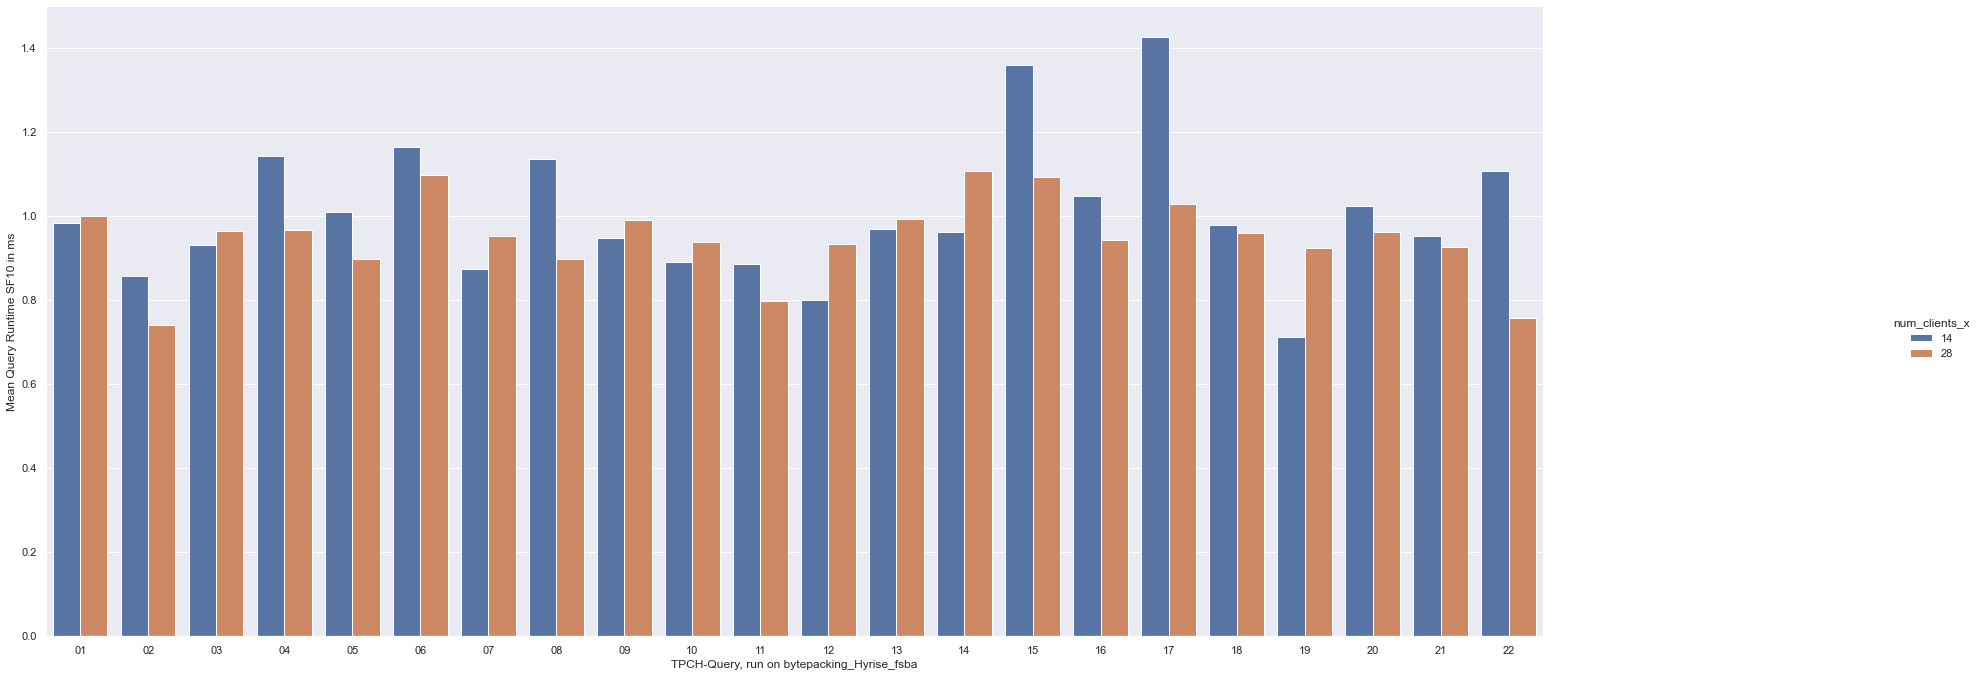

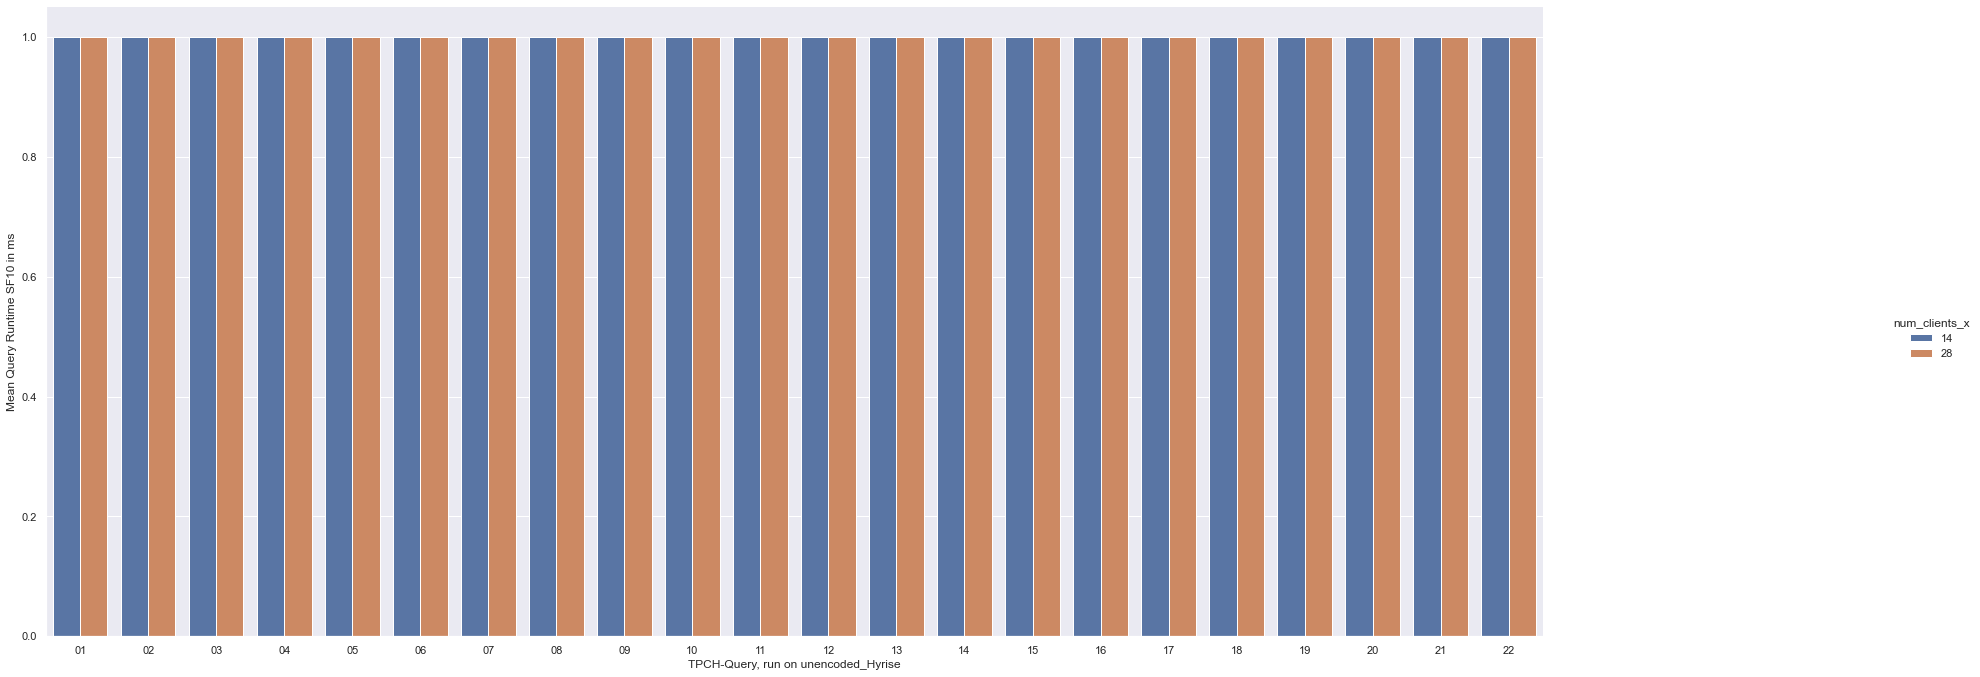

In [11]:
for n in codec_names:
    f = filtered[filtered["codec_name_x"].str.endswith(f"{n}")]
    plot = sns.catplot(data=f, x="query_name_x", y="duration_percentage", kind="bar", hue="num_clients_x")
    plot.set_axis_labels("TPCH-Query, run on " + n, "Mean Query Runtime SF10 in ms")
    plot.fig.set_size_inches(30,10)
    plt.savefig(f"visualizations/tpch_multi_compression_low_level_percentage.svg", format="svg")
    plt.show()

### weird, why are both of our schemes bitpacking_turbopfor and bitpacking_compactvector worde in queries 2, 17 and better in query 6? what is going on?

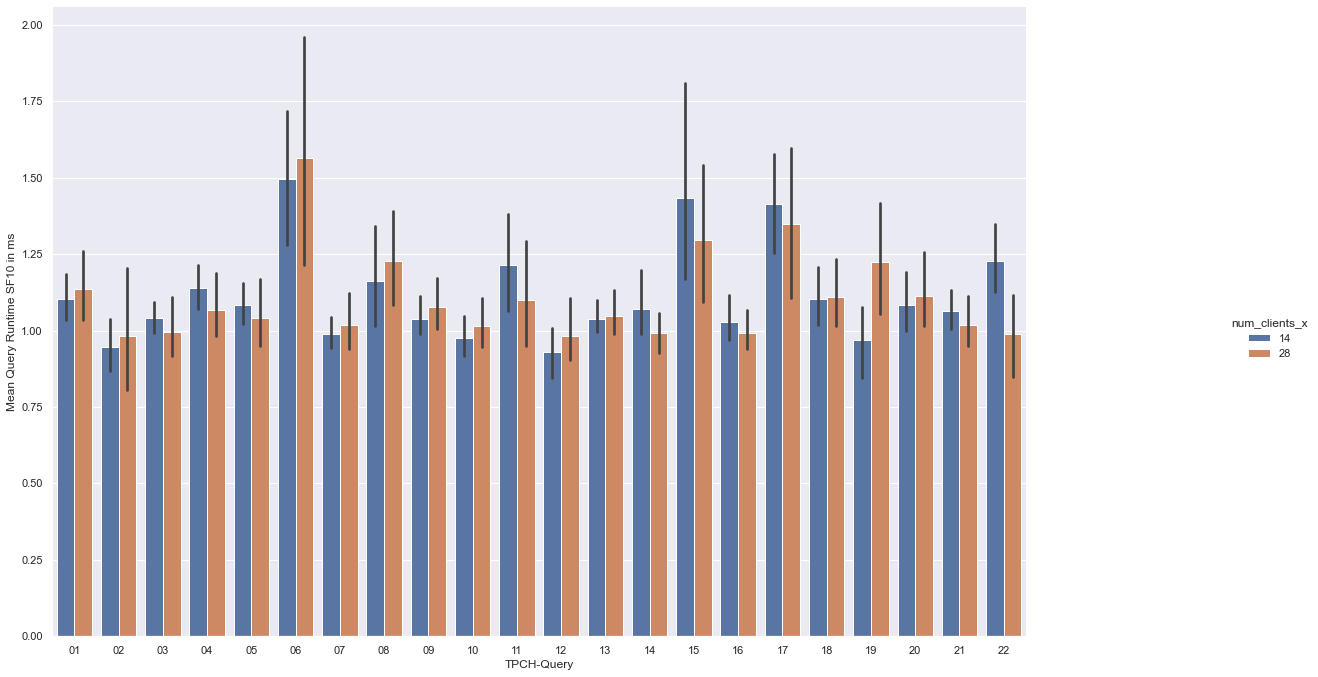

In [12]:

plot = sns.catplot(data=filtered, x="query_name_x", y="duration_percentage", kind="bar", hue="num_clients_x")
plot.set_axis_labels("TPCH-Query", "Mean Query Runtime SF10 in ms")
plot.fig.set_size_inches(20,10)
plt.savefig(f"visualizations/tpch_multi_compression_low_level_percentage.svg", format="svg")

In [13]:
high_level

,benchmark_run_name,total_runtime,avg_throughput,fancy_name,codec_name,num_clients
9,./tpch_bitpacking_compactvector_14_shuffled.json,4.239725e+10,0.327872,bitpacking_compactvector_14_shuffled,bitpacking_compactvector,14
1,./tpch_bitpacking_compactvector_f_14_shuffled....,4.217271e+10,0.330039,bitpacking_compactvector_16_14_shuffled,bitpacking_compactvector_16,14
10,./tpch_bitpacking_simdcai_14_shuffled.json,4.908535e+10,0.283073,for_SIMDCAI_simd_14_shuffled,for_SIMDCAI_simd,14
14,./tpch_bitpacking_simdcai_seq_14_shuffled.json,5.362156e+10,0.259306,for_SIMDCAI_simd_seq_14_shuffled,for_SIMDCAI_simd_seq,14
8,./tpch_bitpacking_turbopfor_14_shuffled.json,4.217997e+10,0.329466,bitpacking_turboPFOR_14_shuffled,bitpacking_turboPFOR,14
3,./tpch_bitpacking_turbopfor_seq_14_shuffled.json,4.596888e+10,0.302277,bitpacking_turboPFOR_seq_14_shuffled,bitpacking_turboPFOR_seq,14
2,./tpch_compressionUnencoded_14_shuffled.json,4.190287e+10,0.331588,unencoded_Hyrise_14_shuffled,unencoded_Hyrise,14
5,./tpch_dictionary_14_shuffled.json,4.069727e+10,0.341751,bytepacking_Hyrise_fsba_14_shuffled,bytepacking_Hyrise_fsba,14
7,./tpch_bitpacking_compactvector_28_shuffled.json,6.154712e+10,0.450786,bitpacking_compactvector_28_shuffled,bitpacking_compactvector,28
15,./tpch_bitpacking_compactvector_f_28_shuffled....,6.095900e+10,0.455742,bitpacking_compactvector_16_28_shuffled,bitpacking_compactvector_16,28


,benchmark_run_name,total_runtime,avg_throughput,fancy_name,codec_name,num_clients,relative_runtime
9,./tpch_bitpacking_compactvector_14_shuffled.json,4.239725e+10,0.327872,bitpacking_compactvector_14_shuffled,bitpacking_compactvector,14,0.683816
1,./tpch_bitpacking_compactvector_f_14_shuffled....,4.217271e+10,0.330039,bitpacking_compactvector_16_14_shuffled,bitpacking_compactvector_16,14,0.680195
10,./tpch_bitpacking_simdcai_14_shuffled.json,4.908535e+10,0.283073,for_SIMDCAI_simd_14_shuffled,for_SIMDCAI_simd,14,0.791687
14,./tpch_bitpacking_simdcai_seq_14_shuffled.json,5.362156e+10,0.259306,for_SIMDCAI_simd_seq_14_shuffled,for_SIMDCAI_simd_seq,14,0.864851
8,./tpch_bitpacking_turbopfor_14_shuffled.json,4.217997e+10,0.329466,bitpacking_turboPFOR_14_shuffled,bitpacking_turboPFOR,14,0.680312
3,./tpch_bitpacking_turbopfor_seq_14_shuffled.json,4.596888e+10,0.302277,bitpacking_turboPFOR_seq_14_shuffled,bitpacking_turboPFOR_seq,14,0.741422
2,./tpch_compressionUnencoded_14_shuffled.json,4.190287e+10,0.331588,unencoded_Hyrise_14_shuffled,unencoded_Hyrise,14,0.675843
5,./tpch_dictionary_14_shuffled.json,4.069727e+10,0.341751,bytepacking_Hyrise_fsba_14_shuffled,bytepacking_Hyrise_fsba,14,0.656398
7,./tpch_bitpacking_compactvector_28_shuffled.json,6.154712e+10,0.450786,bitpacking_compactvector_28_shuffled,bitpacking_compactvector,28,0.992681
15,./tpch_bitpacking_compactvector_f_28_shuffled....,6.095900e+10,0.455742,bitpacking_compactvector_16_28_shuffled,bitpacking_compactvector_16,28,0.983195


In [35]:
multi_tpch_data_folder = "../data/columncompression20210226/shuffled"
multi_tpcds_data_folder = "../data/columncompression20210310/shuffled"

os.system(f"p=$(pwd) && cd {data_folder} && python3 $p/benchmark_to_csv.py .")

def fancy_name(benchmark_name):
    a = benchmark_name.replace("tpch_", "").replace(".json", "").replace("_LTO", "").replace("_singlethreaded", "").replace("","")[2:]
    return map_benchmark_name(a)

def map_benchmark_name(b):
    return b \
        .replace("compactvector_f", "compactvector_16") \
        .replace("compressionUnencoded", "unencoded_Hyrise") \
        .replace("dictionary", "bytepacking_Hyrise_fsba") \
        .replace("bitpacking_simdcai", "for_SIMDCAI_simd") \
        .replace("bitpacking_turbopfor", "bitpacking_turboPFOR") \
        .replace("simdbp", "simdbp128_Hyrise") \

def get_high_level_multi(data_folder):
    high_level = pd.read_csv(f"{data_folder}/benchmarks_parsed_high_level.csv")
    high_level = high_level.sort_values("benchmark_run_name")
    #high_level = high_level[~high_level["benchmark_run_name"].str.match(".*simdbp.*")]
    high_level["fancy_name"] = [fancy_name(b) for b in high_level["benchmark_run_name"]]
    high_level["codec_name"] = ["_".join(b.split("_")[:len(b.split("_")) - 2]) for b in high_level["fancy_name"]]
    high_level["num_clients"] = [int(b.split("_")[len(b.split("_")) - 2]) for b in high_level["fancy_name"]]
    high_level = high_level.sort_values("num_clients")

    base = high_level[high_level["fancy_name"] == "unencoded_Hyrise_28_shuffled"]["total_runtime"].values[0]
    high_level["relative_runtime"] = high_level["total_runtime"] / base

    return high_level

high_level_multi_tpch = get_high_level_multi(multi_tpch_data_folder)
high_level_multi_tpcds = get_high_level_multi(multi_tpcds_data_folder)


In [39]:
high_level_multi_tpch["benchmark"] = "TPC-H"
high_level_multi_tpcds["benchmark"] = "TPC-DS"

all_multi = [high_level_multi_tpch, high_level_multi_tpcds]
new_multi = []

for d in all_multi:
    d_14 = d[d.num_clients == 14]
    d_28 = d[d.num_clients == 28]

    base_14 = d_14[d_14["codec_name"] == "unencoded_Hyrise"]["total_runtime"].values[0]
    base_28 = d_28[d_28["codec_name"] == "unencoded_Hyrise"]["total_runtime"].values[0]

    d_14["relative_runtime"] = d_14["total_runtime"] / base_14
    d_28["relative_runtime"] = d_28["total_runtime"] / base_28
    new_multi.append(pd.concat([d_14, d_28]))

multi_benchmarks = pd.concat(new_multi)

multi_benchmarks_1 = pd.DataFrame({"codec": multi_benchmarks.codec_name,"throughput": multi_benchmarks.avg_throughput, "total_runtime": multi_benchmarks.total_runtime, "benchmark": multi_benchmarks.benchmark, "num_clients": multi_benchmarks.num_clients, "relative_runtime": multi_benchmarks.relative_runtime})
multi_benchmarks_1

,codec,throughput,total_runtime,benchmark,num_clients,relative_runtime
9,bitpacking_compactvector,0.327872,4.239725e+10,TPC-H,14,1.011798
1,bitpacking_compactvector_16,0.330039,4.217271e+10,TPC-H,14,1.006440
10,for_SIMDCAI_simd,0.283073,4.908535e+10,TPC-H,14,1.171408
14,for_SIMDCAI_simd_seq,0.259306,5.362156e+10,TPC-H,14,1.279663
8,bitpacking_turboPFOR,0.329466,4.217997e+10,TPC-H,14,1.006613
3,bitpacking_turboPFOR_seq,0.302277,4.596888e+10,TPC-H,14,1.097034
2,unencoded_Hyrise,0.331588,4.190287e+10,TPC-H,14,1.000000
5,bytepacking_Hyrise_fsba,0.341751,4.069727e+10,TPC-H,14,0.971229
7,bitpacking_compactvector,0.450786,6.154712e+10,TPC-H,28,0.992681
15,bitpacking_compactvector_16,0.455742,6.095900e+10,TPC-H,28,0.983195


In [40]:
def fancy_name(benchmark_name):
    a = benchmark_name.replace("tpch_", "").replace(".json", "").replace("_LTO", "").replace("_singlethreaded", "")[2:]
    return map_benchmark_name(a)

def map_benchmark_name(b):
    return b \
        .replace("compactvector_f", "compactvector_16") \
        .replace("compressionUnencoded", "unencoded_Hyrise") \
        .replace("dictionary", "bytepacking_Hyrise_fsba") \
        .replace("bitpacking_simdcai", "for_SIMDCAI_simd") \
        .replace("bitpacking_turbopfor", "bitpacking_turboPFOR") \
        .replace("simdbp", "simdbp128_Hyrise") \

def get_high_level(data_folder):
    high_level = pd.read_csv(f"{data_folder}/benchmarks_parsed_high_level.csv")
    high_level = high_level.sort_values("benchmark_run_name")
    # high_level = high_level[~high_level["benchmark_run_name"].str.match(".*simdbp.*")]
    high_level["fancy_name"] = [fancy_name(b) for b in high_level["benchmark_run_name"]]
    high_level["LTO"] = high_level["benchmark_run_name"].str.match(".*LTO.*")
    return high_level

def load_table(path: Path) -> DataFrame:
    all_entries: List[List[str]] = []
    av_dict_entries: List[List[int]] = []
    column_names: List[str] = []
    types: List[str] = []
    with path.open() as file:
        table_starts: bool = False
        for line in file:
            if not table_starts and "attribute_vector_size" in line:
                e = [entry for entry in line.split(",") if entry != "" and entry != "\n"]
                av_dict_entries.append([int(e[1]), int(e[3])])
            if len(column_names) != 0 and table_starts and not '|' in line:
                break
            if not '|' in line:
                continue
            if len(column_names) == 0:
                column_names = [entry.replace(" ", "")
                                for entry in line.split("|") if entry != "" and entry != "\n"]
                continue
            if len(types) == 0:
                types =  [entry.replace(" ", "")
                          for entry in line.split("|") if entry != "" and entry != "\n"]
                continue
            if "<ValueS>" in line:
                table_starts = True
                continue
            if not table_starts:
                continue
            new_entry: List[str] = [entry.replace(" ", "")
                                    for entry in line.split("|") if entry != "" and entry != "\n"]
            all_entries.append(new_entry)
    as_type: Dict[str, str] = {column_names[i]:types[i] for i in range(0, len(column_names))}

    entries = [a + b for a,b, in zip(all_entries, av_dict_entries)]
    column_names = column_names + ["attribute_vector_size", "dict_size"]
    df = DataFrame(data=entries, columns=column_names).astype(as_type)

    df["dict_size"] = [1 if d == 0 else d for d in df["dict_size"]]
    df["duplication_factor"] = df["attribute_vector_size"] / df["dict_size"]

    df = df.astype({'duplication_factor': 'int32'})

    return df

def fancy_name(benchmark_name):
    a = benchmark_name.replace("tpch_", "").replace(".json", "").replace("_LTO", "").replace("_singlethreaded", "").replace("sizes_","").replace(".txt", "")
    return map_benchmark_name(a)

def map_benchmark_name(b):
    return b \
        .replace("compactvector_f", "compactvector_16") \
        .replace("compressionUnencoded", "unencoded_Hyrise") \
        .replace("dictionary", "bytepacking_Hyrise_fsba") \
        .replace("bitpacking_simdcai", "for_SIMDCAI_simd") \
        .replace("bitpacking_turbopfor", "bitpacking_turboPFOR") \
        .replace("simdbp", "simdbp128_Hyrise") \

def fancy_codec_name(f):
    return f.replace("sizes_", "").replace(".txt", "")

def compute_sizes(df):
    total_size = df["size_in_bytes"].sum()

    int_col_size = df[df["column_data_type"].str.match("int")]["size_in_bytes"].sum()
    float_col_size = df[df["column_data_type"].str.match("float")]["size_in_bytes"].sum()
    string_col_size = df[df["column_data_type"].str.match("string")]["size_in_bytes"].sum()

    return (total_size, int_col_size, float_col_size, string_col_size)

def get_df(data_path):
    high_level = get_high_level(data_path)
    high_level["fancy_name"] = [n[2:] for n in high_level["fancy_name"]]
    default_filename = "sizes_compressionUnencoded.txt"
    default = load_table(Path(data_path) / "sizes" / default_filename)

    grouped_by_column = default.groupby(["table_name", "column_name", "column_data_type"], as_index=False)["size_in_bytes"].sum()
    columns_per_data_type = grouped_by_column.groupby(["column_data_type"], as_index=False)["column_name"].count()
    size_per_data_type = grouped_by_column.groupby(["column_data_type"], as_index=False)["size_in_bytes"].sum()
    #print("number of columns per datatype")
    #print(columns_per_data_type)



    (default_size, default_int_col_size, default_float_col_size, default_string_col_size) = compute_sizes(default)
    #print("default dict size ", default_size)
    #print("default dict int col size ", default_int_col_size)
    #print("default int col portion of size ", default_int_col_size / default_size)


    names = []
    total_sizes = []
    int_col_sizes = []
    float_col_sizes = []
    string_col_sizes = []
    directory = os.fsencode(Path(data_path) / "sizes")
    for file in os.listdir(directory):
        filename = os.fsdecode(file)
        if filename.endswith(".txt"):
            p = Path(data_path) / "sizes" / filename
            #print(p)
            du = load_table(p)
            #print(du)
            #print(df)
            names.append(filename)
            (total_size, int_col_size, float_col_size, string_col_size) = compute_sizes(du)
            total_sizes.append(total_size)
            int_col_sizes.append(int_col_size)
            float_col_sizes.append(float_col_size)
            string_col_sizes.append(string_col_size)

    df = pd.DataFrame(data={'filename': names, 'total_size': total_sizes, 'int_col_sizes': int_col_sizes, 'float_col_sizes': float_col_sizes, 'string_col_sizes': string_col_sizes})
    #print(df)
    df["codec"] = [fancy_name(f) for f in df["filename"]]
    df = df.sort_values("codec")
    d = df.merge(high_level, left_on="codec", right_on="fancy_name")
    #print(df)
    #print(high_level)
    d["total_size"] = d["total_size"] / 10**9
    d["total_runtime"] = d["total_runtime"] / 10**9
    return d

tpch_folder = "../data/columncompression20210227"
tpcds_folder = "../data/columncompression20210309"

tpch = get_df(tpch_folder)
tpch["benchmark"] = "TPC-H"

tpcds = get_df(tpcds_folder)
tpcds["benchmark"] = "TPC-DS"
all_single = [tpch, tpcds]

for d in all_single:
    base = d[d["codec"] == "unencoded_Hyrise"]["total_runtime"].values[0]
    d["relative_runtime"] = d["total_runtime"] / base

single_benchmarks = pd.concat(all_single)
single_benchmarks

,filename,total_size,int_col_sizes,float_col_sizes,string_col_sizes,codec,benchmark_run_name,total_runtime,avg_throughput,fancy_name,LTO,benchmark,relative_runtime
0,sizes_bitpacking_compactvector.txt,9.868210,1445245248,664533612,7758431223,bitpacking_compactvector,./tpch_bitpacking_compactvector_singlethreaded...,41.215268,1.336982,bitpacking_compactvector,False,TPC-H,1.016044
1,sizes_bitpacking_compactvector_f.txt,11.316270,1609638576,989767660,8716863591,bitpacking_compactvector_16,./tpch_bitpacking_compactvector_f_singlethread...,40.071431,1.420814,bitpacking_compactvector_16,False,TPC-H,0.987846
2,sizes_bitpacking_turbopfor.txt,9.582567,1317708016,600855186,7664003831,bitpacking_turboPFOR,./tpch_bitpacking_turbopfor_singlethreaded.json,39.880828,1.452004,bitpacking_turboPFOR,False,TPC-H,0.983147
3,sizes_bitpacking_turbopfor_seq.txt,9.582567,1317708016,600855186,7664003831,bitpacking_turboPFOR_seq,./tpch_bitpacking_turbopfor_seq_singlethreaded...,43.558703,1.215173,bitpacking_turboPFOR_seq,False,TPC-H,1.073814
4,sizes_dictionary.txt,9.999840,1372782099,676386560,7950670887,bytepacking_Hyrise_fsba,./tpch_dictionary_singlethreaded.json,38.195395,1.573198,bytepacking_Hyrise_fsba,False,TPC-H,0.941597
5,sizes_bitpacking_simdcai.txt,9.567345,1315743428,600776428,7650824755,for_SIMDCAI_simd,./tpch_bitpacking_simdcai_singlethreaded.json,47.996114,1.032475,for_SIMDCAI_simd,False,TPC-H,1.183206
6,sizes_bitpacking_simdcai_seq.txt,9.567345,1315743428,600776428,7650824755,for_SIMDCAI_simd_seq,./tpch_bitpacking_simdcai_seq_singlethreaded.json,48.211274,1.074156,for_SIMDCAI_simd_seq,False,TPC-H,1.188510
7,sizes_simdbp.txt,9.552397,1307080816,602595564,7642720727,simdbp128_Hyrise,./tpch_simdbp_singlethreaded.json,65.993290,0.858254,simdbp128_Hyrise,False,TPC-H,1.626874
8,sizes_compressionUnencoded.txt,13.063740,2083656732,1389433132,9590650263,unencoded_Hyrise,./tpch_compressionUnencoded_singlethreaded.json,40.564471,1.482762,unencoded_Hyrise,False,TPC-H,1.000000
0,sizes_bitpacking_compactvector.txt,6.394814,2901572456,3357457448,135784335,bitpacking_compactvector,./tpch_bitpacking_compactvector_singlethreaded...,35.932983,2.407286,bitpacking_compactvector,False,TPC-DS,1.159508


In [41]:
single_benchmarks["num_clients"] = 1
single_benchmarks_1 = pd.DataFrame({"codec": single_benchmarks.codec,"throughput": single_benchmarks.avg_throughput, "total_runtime": single_benchmarks.total_runtime, "benchmark": single_benchmarks.benchmark, "num_clients": single_benchmarks.num_clients, "relative_runtime": single_benchmarks.relative_runtime})

all_benchmarks = pd.concat([single_benchmarks_1, multi_benchmarks_1])
all_benchmarks

,codec,throughput,total_runtime,benchmark,num_clients,relative_runtime
0,bitpacking_compactvector,1.336982,4.121527e+01,TPC-H,1,1.016044
1,bitpacking_compactvector_16,1.420814,4.007143e+01,TPC-H,1,0.987846
2,bitpacking_turboPFOR,1.452004,3.988083e+01,TPC-H,1,0.983147
3,bitpacking_turboPFOR_seq,1.215173,4.355870e+01,TPC-H,1,1.073814
4,bytepacking_Hyrise_fsba,1.573198,3.819539e+01,TPC-H,1,0.941597
5,for_SIMDCAI_simd,1.032475,4.799611e+01,TPC-H,1,1.183206
6,for_SIMDCAI_simd_seq,1.074156,4.821127e+01,TPC-H,1,1.188510
7,simdbp128_Hyrise,0.858254,6.599329e+01,TPC-H,1,1.626874
8,unencoded_Hyrise,1.482762,4.056447e+01,TPC-H,1,1.000000
0,bitpacking_compactvector,2.407286,3.593298e+01,TPC-DS,1,1.159508


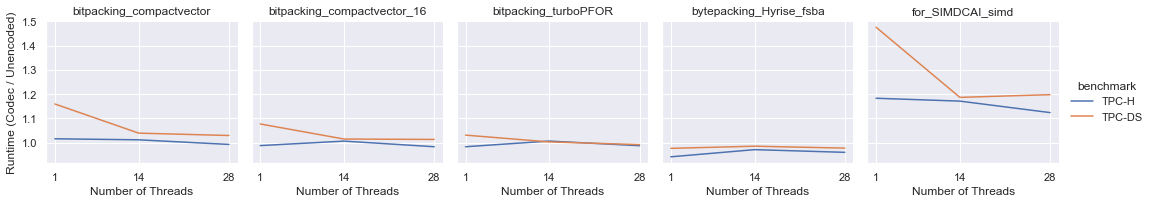

In [51]:
g = sns.FacetGrid(all_benchmarks[~all_benchmarks.codec.str.match(".*(simdbp128_Hyrise|_seq|unencoded)")], col="codec", hue="benchmark", legend_out=True)
g.map(plt.plot, "num_clients", "relative_runtime")
g.set_axis_labels("Number of Threads", "Runtime (Codec / Unencoded)")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.add_legend()
for ax in g.axes[0]:
    ax.set_xticks([1, 14, 28])
